# Data Cleaning and analysis

# Bellabeat CaseStudy:
   Bellabeat which is a manufacturer of health-focused products for women. The Möbius dataset was recommended in order to gain market insights about user behavior in the area of wearable fitness trackers.

# Business Task:
   1.Gain insights about how consumers are using their smart devices in order        to derive recommendations for Bellabeat's own marketing strategy in terms      of new growth opportunities.
   2.The following analysis should in particular help drive the growth of            Bellabeat's wellness watch which tracks user activity, sleep and stress by      revealing insights from a third party dataset
   
   The following key stakeholders are involved in the project:

   1.Urška Sršen, co-founder and Chief Creative Officer (sponsor)
   
   2.Sando Mur, co-founder and mathematician
   
   3.Other members of the executive team
   
   4.The marketing analytics team


# Description of Möbius dataset:

   The dataset consists of 18 csv files organized in long data format which        means the each row is one observation per user. Most users have data in        multiple rows.
   
   Due to anonymized IDs the data cannot be associated with the real username      anymore and therefore protects the privacy of the users.

# Research questions:
   In order to have an initial direction for the analysis, I would like to        verify the following hypotheses:

   1.People exercise more often at the weekend.
   
   2.People mostly exercise after work.
   
   3.People who sleep less than 6 hours tend to exercise less than the average.
   
   4.Exercise correlates with a reduced time to fall asleep.
   
   5.People are lazy in terms of manually adjusting or inputting information.
   
   6.People who perform more high-intensity workouts (MET>6) burn more calories      in average
   
   7.Many people don't wear the device at night (due to charging, discomfort,        etc.)
   


# Selected Data:
   I have decided to focus on the following files during my analysis:

   1.daily_activity which already combines data from various other files
     hourly_calories
     
   2.sleep_day
   
   3.weight_log_info
   
   Let's load the libraries and csv files to have a first look at it.


In [157]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
#importing required csv files
daily_activity = pd.read_csv("dailyActivity_merged.csv")
weight_info = pd.read_csv("weightLogInfo_merged.csv")
sleep_day = pd.read_csv("sleepDay_merged.csv")
hourly_calories = pd.read_csv("hourlyCalories_merged.csv")

# Daily Activities

In [159]:
#Analysis for daily_activities csv file
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [160]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

####  
We have in total 15 different columns and 940 entries. The columns contain object data types, integers or floating point numbers. Let's convert the string (object) ActivityDate into a Pandas date time object and add a separate column for the day of the week. After that let's check how many unique users we have.

In [161]:
#create a new column 'ActivityDate_new' based on 'ActivityDate'
daily_activity['ActivityDate_new'] = daily_activity['ActivityDate']
#convert the object data type into a Pandas date time object
daily_activity['ActivityDate_new']= pd.to_datetime(daily_activity['ActivityDate_new'])
#move the new column to position 1 and delete old column ActivityDate
ActivityDate_new = daily_activity['ActivityDate_new']
daily_activity.drop(labels=['ActivityDate_new'], axis=1, inplace = True)
daily_activity.drop(labels=['ActivityDate'], axis=1, inplace = True)
daily_activity.insert(1, 'ActivityDate_new', ActivityDate_new)

#create a new column for day of the week
#this assigns numerical value to each day of week, starting from monday as 0
daily_activity['Day_Of_Week'] = pd.to_datetime(daily_activity['ActivityDate_new']).dt.dayofweek
daily_activity['Day_Of_Week_Str'] = pd.to_datetime(daily_activity['ActivityDate_new']).dt.strftime('%A')

#move both columns to the beginning
Day_Of_Week = daily_activity['Day_Of_Week']
Day_Of_Week_Str=daily_activity['Day_Of_Week_Str']

daily_activity.drop(labels=['Day_Of_Week'], axis=1, inplace = True)
daily_activity.drop(labels=['Day_Of_Week_Str'], axis=1, inplace = True)

daily_activity.insert(2, 'Day_Of_Week', Day_Of_Week)
daily_activity.insert(3, 'Day_Of_Week_Str', Day_Of_Week_Str)

daily_activity

,Id,ActivityDate_new,Day_Of_Week,Day_Of_Week_Str,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,1,Tuesday,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,2,Wednesday,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,3,Thursday,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,4,Friday,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,5,Saturday,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,6,Sunday,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,0,Monday,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,1,Tuesday,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,2,Wednesday,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [162]:
len(daily_activity['Id'].unique())

33

####   
In total 33 unique users have participated in the survey from April 12 till May 12, 2016. That should add up to 33x31 = 1023 maximum possible values on a daily basis. However only 940 entries were provided. It's unclear if due to preprocessing certain observations were already deleted.

We can also tell from the dataframe.info() function that the daily_activity dataframe doesn't contain any null values (missing values). However let's run some checks to see if specific rows contain 0 values for the steps column. This would indicate the wearable was not worn on a specific day (charging, forgotten to put on, intentiously not worn, technical issue, etc.)



In [163]:
daily_activity[daily_activity['TotalSteps']==0]

,Id,ActivityDate_new,Day_Of_Week,Day_Of_Week_Str,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,2016-05-12,3,Thursday,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
104,1844505072,2016-04-24,6,Sunday,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
105,1844505072,2016-04-25,0,Monday,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
106,1844505072,2016-04-26,1,Tuesday,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
112,1844505072,2016-05-02,0,Monday,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,2016-05-06,4,Friday,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
905,8792009665,2016-05-07,5,Saturday,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
906,8792009665,2016-05-08,6,Sunday,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
907,8792009665,2016-05-09,0,Monday,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688


In [164]:
daily_no_activity = daily_activity[['Id']][daily_activity['TotalSteps']==0]
daily_no_activity['Id']

30     1503960366
104    1844505072
105    1844505072
106    1844505072
112    1844505072
          ...    
904    8792009665
905    8792009665
906    8792009665
907    8792009665
908    8792009665
Name: Id, Length: 77, dtype: int64

In [165]:
daily_no_activity['Id'].nunique()

15

In [166]:
daily_activity[daily_activity['Id']==1844505072]

,Id,ActivityDate_new,Day_Of_Week,Day_Of_Week_Str,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
92,1844505072,2016-04-12,1,Tuesday,6697,4.43,4.43,0.0,0.00,0.00,4.43,0.0,0,0,339,1101,2030
93,1844505072,2016-04-13,2,Wednesday,4929,3.26,3.26,0.0,0.00,0.00,3.26,0.0,0,0,248,1192,1860
94,1844505072,2016-04-14,3,Thursday,7937,5.25,5.25,0.0,0.00,0.00,5.23,0.0,0,0,373,843,2130
95,1844505072,2016-04-15,4,Friday,3844,2.54,2.54,0.0,0.00,0.00,2.54,0.0,0,0,176,527,1725
96,1844505072,2016-04-16,5,Saturday,3414,2.26,2.26,0.0,0.00,0.00,2.26,0.0,0,0,147,1293,1657
97,1844505072,2016-04-17,6,Sunday,4525,2.99,2.99,0.0,0.14,0.26,2.59,0.0,2,8,199,1231,1793
98,1844505072,2016-04-18,0,Monday,4597,3.04,3.04,0.0,0.00,0.48,2.56,0.0,0,12,217,1211,1814
99,1844505072,2016-04-19,1,Tuesday,197,0.13,0.13,0.0,0.00,0.00,0.13,0.0,0,0,10,1430,1366
100,1844505072,2016-04-20,2,Wednesday,8,0.01,0.01,0.0,0.00,0.00,0.01,0.0,0,0,1,1439,1349
101,1844505072,2016-04-21,3,Thursday,8054,5.32,5.32,0.0,0.12,0.52,4.68,0.0,2,13,308,1117,2062


####  
User 1844505072 for example didn't record any data from April 24-26 (3 days), May 2nd (1 day) and May 7-12 (6 days). This user also shows relatively low values for certain days. Unless the user has been hospitalized, sits in a wheelchair or the device has any issues, the TotalSteps cannot equal 0. Let's filter once more for a low value of TotalSteps but this time increase the threshold to 100 steps which roughly equals 76 meters. Even people who relax at home and only walk to the toilet or fridge a few times should have more than 100 steps daily if they wear a fully functional fitness tracking device.

In [167]:
daily_activity[daily_activity['TotalSteps']<100]

,Id,ActivityDate_new,Day_Of_Week,Day_Of_Week_Str,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,2016-05-12,3,Thursday,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,0
100,1844505072,2016-04-20,2,Wednesday,8,0.01,0.01,0.0,0.0,0.0,0.01,0.0,0,0,1,1439,1349
104,1844505072,2016-04-24,6,Sunday,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1347
105,1844505072,2016-04-25,0,Monday,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1347
106,1844505072,2016-04-26,1,Tuesday,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,2016-05-06,4,Friday,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1688
905,8792009665,2016-05-07,5,Saturday,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1688
906,8792009665,2016-05-08,6,Sunday,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1688
907,8792009665,2016-05-09,0,Monday,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1688


####   
For the following analysis all rows where TotalDistance < 100 should be dropped since it would distort the daily averages. My assumption behind is that either the watch hasn't been worn properly or there were other data collection problems.

In [168]:
#dropping above records
daily_activity.drop(daily_activity[daily_activity['TotalSteps']<100].index, inplace=True)

In [169]:
daily_activity.describe()

,Id,Day_Of_Week,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,8.530000e+02,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,4.869444e+09,2.915592,8416.616647,6.049414,6.033599,0.119204,1.655944,0.625428,3.681360,0.001770,23.284877,14.948417,212.453693,953.554513,2372.992966
std,2.421849e+09,1.937377,4686.391097,3.685989,3.668055,0.649765,2.745507,0.907849,1.826208,0.007693,33.749940,20.483754,94.674246,274.288526,695.671508
min,1.503960e+09,0.000000,108.000000,0.080000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,52.000000
25%,2.320127e+09,1.000000,4978.000000,3.450000,3.450000,0.000000,0.000000,0.000000,2.370000,0.000000,0.000000,0.000000,148.000000,721.000000,1867.000000
50%,4.558610e+09,3.000000,8095.000000,5.640000,5.640000,0.000000,0.430000,0.310000,3.600000,0.000000,7.000000,8.000000,210.000000,1020.000000,2225.000000
75%,6.962181e+09,5.000000,11107.000000,7.960000,7.910000,0.000000,2.290000,0.870000,4.910000,0.000000,36.000000,21.000000,272.000000,1187.000000,2839.000000
max,8.877689e+09,6.000000,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


####  
Another interesting fact is that the average LoggedActivitiesDistance is relatively low compared to TotalDistance (0.117822km vs 5,979513km). Obviously users do not actively log their activity. This could point into the direction that users prefer automatic logging of their activity.

Furthermore TotalDistance and TrackerDistance seem almost identical. Let's have a closer look later.

Sedentary active distance sometimes shows values > 0. Let's set all values to 0 since it is not supposed to be greater 0.

TotalSteps, Tracker Distance, SedentaryMinutes and Calories have a relatively high standard deviations which shows different behavior. Let's group users later for better comparison.


In [170]:
daily_activity.drop('TotalDistance', inplace=True, axis=1)

In [171]:
#setting all values of SedentaryActiveDistance to 0
daily_activity = daily_activity.assign(SedentaryActiveDistance=0)
daily_activity

,Id,ActivityDate_new,Day_Of_Week,Day_Of_Week_Str,TotalSteps,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,1,Tuesday,13162,8.500000,0.0,1.88,0.55,6.06,0,25,13,328,728,1985
1,1503960366,2016-04-13,2,Wednesday,10735,6.970000,0.0,1.57,0.69,4.71,0,21,19,217,776,1797
2,1503960366,2016-04-14,3,Thursday,10460,6.740000,0.0,2.44,0.40,3.91,0,30,11,181,1218,1776
3,1503960366,2016-04-15,4,Friday,9762,6.280000,0.0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,2016-04-16,5,Saturday,12669,8.160000,0.0,2.71,0.41,5.04,0,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,6,Sunday,10686,8.110000,0.0,1.08,0.20,6.80,0,17,4,245,1174,2847
936,8877689391,2016-05-09,0,Monday,20226,18.250000,0.0,11.10,0.80,6.24,0,73,19,217,1131,3710
937,8877689391,2016-05-10,1,Tuesday,10733,8.150000,0.0,1.35,0.46,6.28,0,18,11,224,1187,2832
938,8877689391,2016-05-11,2,Wednesday,21420,19.559999,0.0,13.22,0.41,5.89,0,88,12,213,1127,3832


####  
Let's use the groupby() and mean() function to get some averages for each user:

In [172]:
#getting averages for each user
g = daily_activity.groupby(['Id']).mean().reset_index()

h = g[["TotalSteps","Id","Calories"]].sort_values(['TotalSteps']).reset_index().drop(['index'],axis=1)

In [173]:
h.count()

TotalSteps    33
Id            33
Calories      33
dtype: int64

####  
Let's visualize the average steps per day for each user (based on measured days only).

Text(0.5, 1.0, 'Average daily Calories(Line) & Total Steps Per User(Bars)')

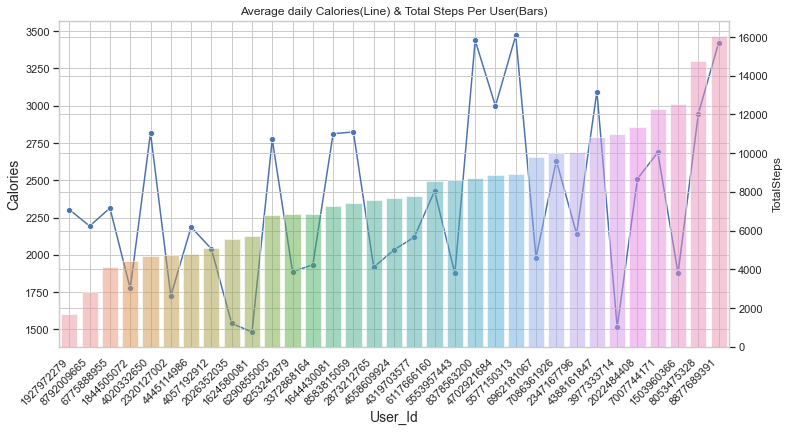

In [174]:
order_Id = h['Id'].to_list()
#visualizing avg. steps per day of each user
fig, ax1 = plt.subplots(figsize=(12,6))
#change the orientation of the x-axis to 45 degrees due to length of user ID
plt.xticks(rotation = 45, horizontalalignment = 'right')
sns.lineplot(data = h['Calories'], marker = 'o', ax = ax1, sort = False)
plt.xlabel('User_Id',size = 14)
plt.ylabel('Calories',size = 14)
ax2 = ax1.twinx()
sns.barplot(data = h, x='Id', y='TotalSteps', alpha=0.5, ax=ax2, order=order_Id)
plt.title('Average daily Calories(Line) & Total Steps Per User(Bars)')
#plt.rcParams['figsize.dpi'] = 200;

####  
Daily average steps as well as daily average calories vary a lot for the population. In addition we can see that people with similar daily steps show different calorie levels. This might be due to different levels of intensities or non-step based activities such as cycling or swimming. Running for half an hour consumes significantly more calories than walking for the same amount of time. Therefore let's have a closer look at the breakdown of activity intensities

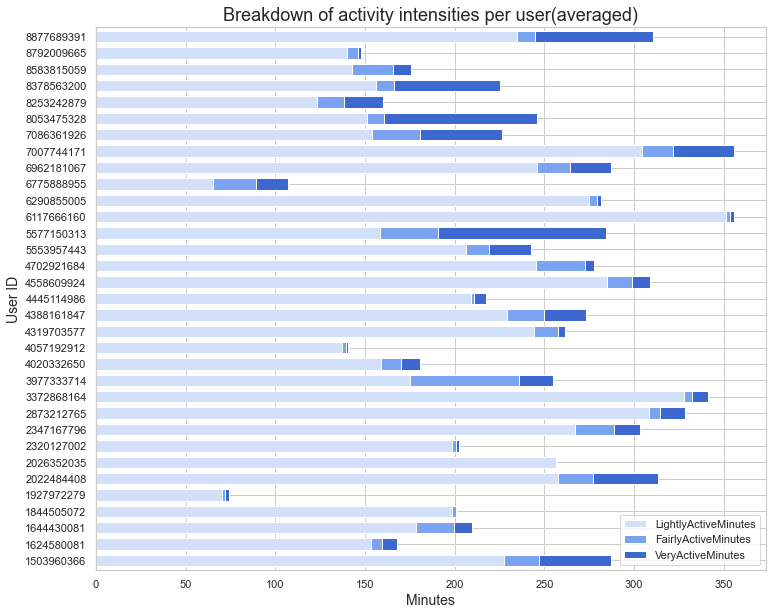

In [175]:
a = g[['Id', 'LightlyActiveMinutes', 'FairlyActiveMinutes','VeryActiveMinutes']]
fig, ax = plt.subplots(figsize = (12, 10))
#Horizintal bar orientation
a.plot(x='Id', kind='barh',stacked=True,mark_right=True,color=['#D3E0F9','#7AA3F1','#3D68CF'],width=0.7,ax=ax)
plt.xlabel('Minutes',size=14)
plt.ylabel('User ID', size=14)
plt.title('Breakdown of activity intensities per user(averaged)', size=18)
plt.legend(loc = 'lower right');

####  
The intensities also strongly vary among the population. Some users have almost no very active minutes which means that they almost never perform sports or activities bigger than 6 METs, such as jogging, swimming, cycling (faster speeds), weight-lifting.

In [176]:
g[g['VeryActiveMinutes']>30].sort_values(['VeryActiveMinutes'])

,Id,Day_Of_Week,TotalSteps,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
25,7007744171,2.958333,12267.041667,8.207083,2.295229,2.616250,0.800000,5.266667,0.0,33.625000,17.625000,304.125000,1078.666667,2686.125000
5,2022484408,2.903226,11370.645161,8.084193,0.000000,2.421613,0.720000,4.942581,0.0,36.290323,19.354839,257.451613,1112.580645,2509.967742
0,1503960366,2.900000,12520.633333,8.070000,0.000000,2.953667,0.820667,4.291333,0.0,40.000000,19.800000,227.266667,828.433333,1876.966667
26,7086361926,2.724138,10017.034483,6.828276,0.000000,2.973103,0.826552,3.012759,0.0,45.517241,27.103448,153.655172,809.896552,2630.793103
29,8378563200,2.903226,8717.709677,6.913548,1.116158,2.503548,0.519032,3.889355,0.0,58.677419,10.258065,156.096774,716.129032,3436.580645
32,8877689391,2.903226,16040.032258,13.212903,0.000000,6.637419,0.337742,6.188710,0.0,66.064516,9.935484,234.709677,1112.870968,3420.258065
27,8053475328,2.903226,14763.290323,11.475161,0.000000,8.514839,0.423871,2.533871,0.0,85.161290,9.580645,150.967742,1148.000000,2945.806452
20,5577150313,2.714286,8897.607143,6.657143,0.000000,3.336071,0.705000,2.601429,0.0,93.571429,31.964286,158.500000,705.464286,3469.678571


####   
8 users have imore than 30 very active minutes daily in average.

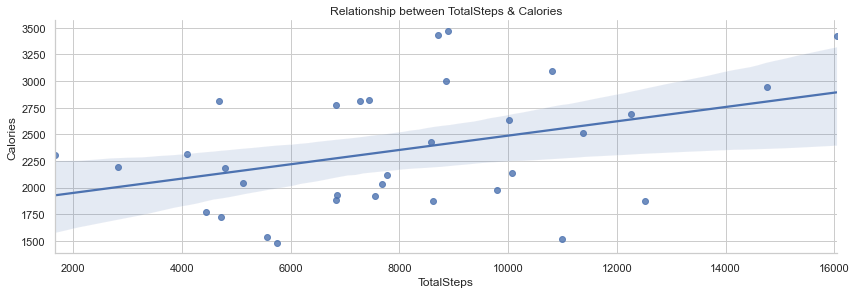

In [177]:
sns.lmplot(x='TotalSteps', y='Calories', data=g,height=4,aspect=3)
plt.title('Relationship between TotalSteps & Calories');

####  
There is no very clear positive correlation between total steps and calories. The regression line which minimizes the distance to all points to the line doesn't support a strong correlation. Only a few datapoints would be needed to change the slope from positive to negative. Let's check the exact correlation of all relevant features via a heatmap.

Text(0.5, 1.0, 'Correlations of selected features')

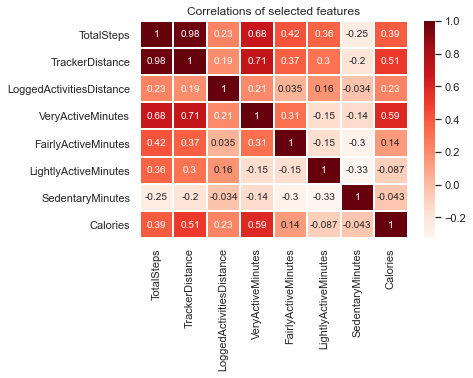

In [178]:
#corelation of all relevant features via a heatmap
sns.heatmap(g[['TotalSteps','TrackerDistance','LoggedActivitiesDistance',
               'VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes',
               'Calories']].corr(),cmap='Reds',linecolor='white',linewidths=1,annot=True)
plt.title('Correlations of selected features')

####  
We could already tell from the graphs before that TotalSteps and Calories only have a correlation coefficient of 0.39 which is relatively low. A lower correlation coefficient has a different (lower) significance compared to a higher one. The relationship between TotalSteps and TrackerDistance is as expected almost perfect. The second highest correlation is between VeryActiveMinutes and TrackerDistance (0.71). This stronger correlation might support the thesis that the more a user works out at higher intensities (e.g. running), the higher the TrackerDistance. Third highest correlation is between VeryActiveMinutes and Calories. There is almost not correlation between SedentaryMinutes and Calories.

In [179]:
daily_activity['LoggedActivitiesDistance'].value_counts()


0.000000    821
2.092147      9
2.253081      7
4.911146      1
4.924841      1
4.942142      1
4.878232      1
4.081692      1
4.861792      1
4.912368      1
1.959596      1
4.869783      1
4.930550      1
2.832326      1
3.285415      1
4.851307      1
3.167822      1
2.785175      1
4.885605      1
Name: LoggedActivitiesDistance, dtype: int64

####  
Users only logged their activities for 32 times out of 853 (verified) times. 821 times activity hasn't been logged.

Let's verify the hypothesis if people are more active at the weekend by checking calories and daily steps based on week days.

In [180]:
daily_activity.groupby(['Day_Of_Week']).mean().reset_index().drop(['Id'],axis=1)


,Day_Of_Week,TotalSteps,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,0,8565.522936,6.086330,0.247213,1.692477,0.644954,3.702110,0.0,25.440367,15.412844,211.422018,986.376147,2389.201835
1,1,9014.540146,6.449197,0.187564,1.789927,0.657956,3.851022,0.0,25.467153,15.905109,218.941606,970.160584,2445.343066
2,2,8276.598540,5.986350,0.152834,1.788467,0.577080,3.565255,0.0,22.751825,14.343066,207.854015,946.744526,2353.897810
3,3,8247.280303,5.888182,0.143974,1.548485,0.562576,3.656136,0.0,21.613636,13.318182,206.477273,927.696970,2289.719697
4,4,7952.466102,5.661949,0.077080,1.401949,0.516610,3.725169,0.0,21.415254,12.932203,217.991525,982.703390,2376.601695
5,5,9026.232143,6.481875,0.000000,1.676875,0.749911,4.004643,0.0,23.973214,16.830357,229.312500,925.500000,2435.839286
6,6,7767.370370,5.632037,0.000000,1.668148,0.692407,3.240185,0.0,22.388889,16.277778,194.870370,936.851852,2321.740741


####  
Tuesday and Saturday have the highest average step number as well as calorie consumption. Friday and Sunday are those with the lowest. Our initial hypothesis is only partly true. Let's plot the results. (However the difference is only about 10-15%, not very significant).

Text(0.5, 0.98, 'Weekly activity breakdown')

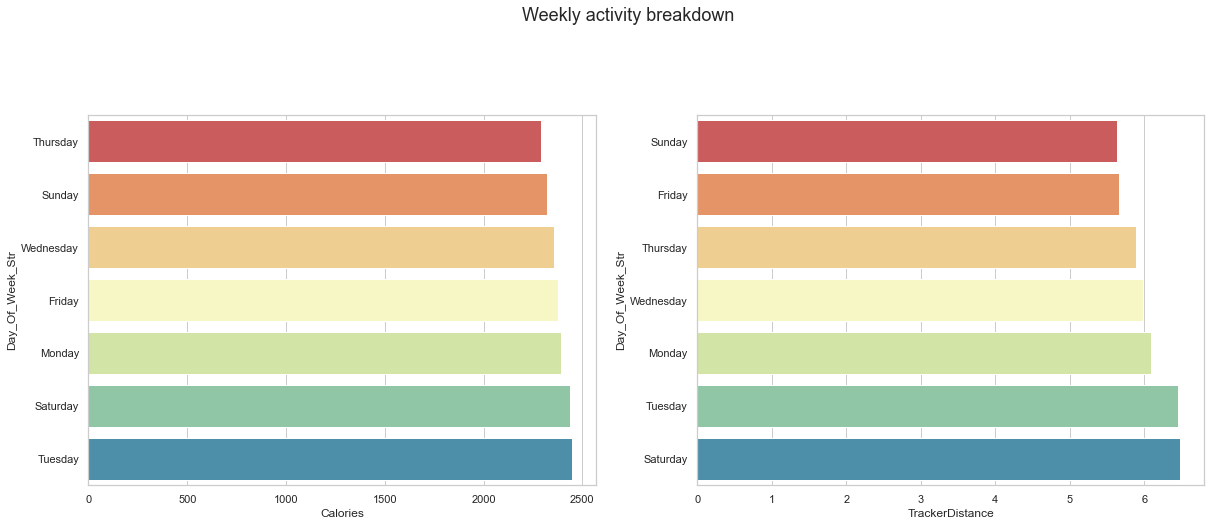

In [181]:
from matplotlib.gridspec import GridSpec
sns.set(style="whitegrid")

w = daily_activity.groupby(['Day_Of_Week_Str']).mean().reset_index()

plt.figure(2, figsize=(20,15))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1], title='')
sns.barplot(x='TrackerDistance', y='Day_Of_Week_Str', data=w.sort_values(['TrackerDistance']).reset_index(drop=True), palette='Spectral', orient='horizontal')

plt.subplot(the_grid[0, 0], title='')

sns.barplot(x='Calories', y='Day_Of_Week_Str', data=w.sort_values(['Calories']).reset_index(drop=True), palette='Spectral', orient='horizontal')

plt.suptitle('Weekly activity breakdown', fontsize=18)

# Hourly calories dataset:

In [182]:
hourly_calories.head(5)


,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [183]:
hourly_calories.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [184]:
#check how many users have provided at least one data point
hourly_calories['Id'].nunique()

33

####  
There are no null values. Let's convert the column activity hour into a Python date time object.

In [185]:
#convert to pandas date time object
hourly_calories['ActivityHour_new']= pd.to_datetime(hourly_calories['ActivityHour'])
hourly_calories.drop(labels=['ActivityHour'], axis=1, inplace = True)
hourly_calories.head(3)

,Id,Calories,ActivityHour_new
0,1503960366,81,2016-04-12 00:00:00
1,1503960366,61,2016-04-12 01:00:00
2,1503960366,59,2016-04-12 02:00:00


####  
Let's create a new column which assigns the day of the week and then plot two diagrams: average calories per hour during weekdays and during the weekend.

In [186]:
#extract week day from column ActivityHour_new and create a new column for that
#Monday = 0, Tuesday = 1, ... Saturday = 5, Sunday = 6
hourly_calories['day_of_week'] = pd.to_datetime(hourly_calories['ActivityHour_new']).dt.dayofweek
#weekend
hourly_calories_weekend = hourly_calories[hourly_calories['day_of_week']>=5]
#week day
hourly_calories_weekdays = hourly_calories[hourly_calories['day_of_week']<5]

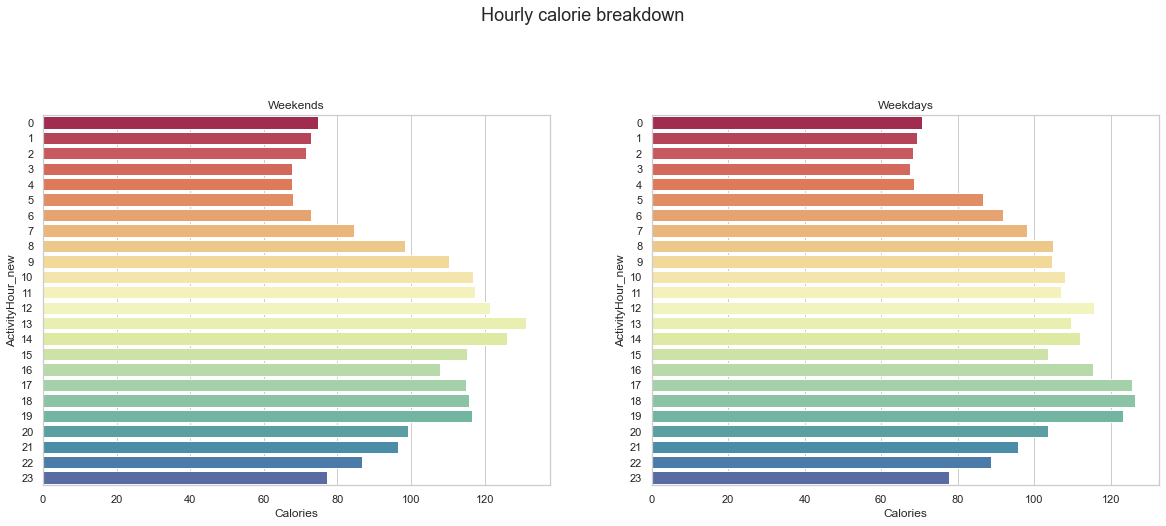

In [187]:
from matplotlib.gridspec import GridSpec
sns.set(style="whitegrid")

#data
weekday = hourly_calories_weekdays.groupby(hourly_calories_weekdays["ActivityHour_new"].dt.hour).mean().reset_index()
weekend = hourly_calories_weekend.groupby(hourly_calories_weekend["ActivityHour_new"].dt.hour).mean().reset_index()

plt.figure(2, figsize=(20,15))
the_grid = GridSpec(2, 2)

# first plot weekdays
plt.subplot(the_grid[0, 1], title='Weekdays')
sns.barplot(x='Calories', y='ActivityHour_new', data=weekday, palette='Spectral', orient='horizontal')

# second plot weekend
plt.subplot(the_grid[0, 0], title='Weekends')
sns.barplot(x='Calories', y='ActivityHour_new', data=weekend, palette='Spectral', orient='horizontal')

# overall title
plt.suptitle('Hourly calorie breakdown', fontsize=18);

####  
On weekends people are most active from 12-3pm. During the week from 5-8pm (which is probably for most people after work).

# Weight data:

In [188]:
weight_info.head(5)


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [189]:
weight_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [190]:
weight_info.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


In [191]:
weight_info['Id'].unique()

array([1503960366, 1927972279, 2873212765, 4319703577, 4558609924,
       5577150313, 6962181067, 8877689391], dtype=int64)

####  
Only 8 out of 33 users have provided any weight related data.



In [192]:
#delete the columns LogId and Fat
weight_info.drop('LogId', inplace=True, axis=1)
weight_info.drop('Fat', inplace=True, axis=1)

In [193]:
#create a new column 'date_new' based on 'Date'
weight_info['date_new'] = weight_info['Date']
#convert the object data type into a Pandas date time object
weight_info['date_new']= pd.to_datetime(weight_info['date_new'])
weight_info.drop(labels=['Date'], axis=1, inplace = True)
weight_info.head()

,Id,WeightKg,WeightPounds,BMI,IsManualReport,date_new
0,1503960366,52.599998,115.963147,22.650000,True,2016-05-02 23:59:59
1,1503960366,52.599998,115.963147,22.650000,True,2016-05-03 23:59:59
2,1927972279,133.500000,294.317120,47.540001,False,2016-04-13 01:08:52
3,2873212765,56.700001,125.002104,21.450001,True,2016-04-21 23:59:59
4,2873212765,57.299999,126.324875,21.690001,True,2016-05-12 23:59:59


In [194]:
weight_info_grouped = weight_info.groupby(['Id']).mean()
weight_info_grouped['IsManualReport'].value_counts()

True     5
False    3
Name: IsManualReport, dtype: int64

####  
3 of 8 users who logged their weight have a scale that is connected to their FitBit account. Having a scale which is automatically connected is a huge improvement in terms of user experience. The user doesn't need to record the weight manually.

Let's rearrange the dataframe by ID to see the average BMI:

In [195]:
weight_info.groupby(['Id']).mean().reset_index()

,Id,WeightKg,WeightPounds,BMI,IsManualReport
0,1503960366,52.599998,115.963147,22.650000,True
1,1927972279,133.500000,294.317120,47.540001,False
2,2873212765,57.000000,125.663489,21.570001,True
3,4319703577,72.350002,159.504452,27.415000,True
4,4558609924,69.639999,153.529918,27.214000,True
5,5577150313,90.699997,199.959265,28.000000,False
6,6962181067,61.553334,135.701872,24.028000,True
7,8877689391,85.145834,187.714432,25.487083,False


####  
According to the WHO a BMI greater than 25 is considered overweight and above 30 is considered obese. Based on this 3 out of 8 participants who have provided weight data fall into the healthy weight category, 4 are considered overweight and one is considered severely obese.

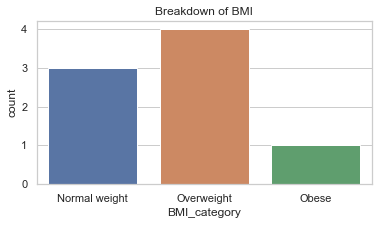

In [196]:
def BMI_category(x):
    
    if x>18.5 and x<25:
        return "Normal weight"
    elif x>=25 and x<30:
        return "Overweight"
    elif x>=30:
        return "Obese"

df = weight_info.groupby(['Id']).mean().reset_index()   
#use lambda function to create a new column based on ranges   
df['BMI_category'] = df['BMI'].apply(lambda x: BMI_category(x))
df

fig, ax1 = plt.subplots(figsize=(6,3))
sns.countplot(x='BMI_category', data=df, order=['Normal weight', 'Overweight', 'Obese']);
plt.title('Breakdown of BMI');

####  
Let's compare the first recorded weight with the last one to see if there is any weight loss/gain.

In [197]:
#create list of unique IDs
weight_id = weight_info['Id'].unique()
#for loop to append earliest_date, latest_date and weight_dif list
earliest_date = []
latest_date = []
weight_dif = []
for x in weight_id:
    #use min() and max() function to find earliest/latest recording
    #alternative: use sort_values function 
    a = weight_info[weight_info['Id']==x]
    earliest_date.append(a['date_new'].min())
    latest_date.append(a['date_new'].max())
    #sort values by date in order to pick first and last weight
    b = a.sort_values('date_new')
    #calculate difference between earliest recorded and last recorded weight
    dif = b['WeightKg'].tolist()[-1]-b['WeightKg'].tolist()[0]
    weight_dif.append(dif)

#check the number of weight records for each user 
number_of_records = []
for x in weight_id:
    individual_records = weight_info[weight_info['Id']==x]['Id'].tolist()
    c = len(individual_records)
    number_of_records.append(c)

#convert lists into dataframe
a_dict = {"Id":weight_id, "earliest_date":earliest_date, "latest_date":latest_date, "weight_difference": weight_dif, "number_of_records":number_of_records}
new_df = pd.DataFrame(a_dict)
difference = new_df['latest_date']-new_df['earliest_date']
new_df.insert(3,'time_difference', difference, True)
new_df

,Id,earliest_date,latest_date,time_difference,weight_difference,number_of_records
0,1503960366,2016-05-02 23:59:59,2016-05-03 23:59:59,1 days 00:00:00,0.000000,2
1,1927972279,2016-04-13 01:08:52,2016-04-13 01:08:52,0 days 00:00:00,0.000000,1
2,2873212765,2016-04-21 23:59:59,2016-05-12 23:59:59,21 days 00:00:00,0.599998,2
3,4319703577,2016-04-17 23:59:59,2016-05-04 23:59:59,17 days 00:00:00,-0.099998,2
4,4558609924,2016-04-18 23:59:59,2016-05-09 23:59:59,21 days 00:00:00,-0.599998,5
5,5577150313,2016-04-17 09:17:55,2016-04-17 09:17:55,0 days 00:00:00,0.000000,1
6,6962181067,2016-04-12 23:59:59,2016-05-12 23:59:59,30 days 00:00:00,-0.599998,30
7,8877689391,2016-04-12 06:47:11,2016-05-12 06:42:53,29 days 23:55:42,-1.800003,24


####  
Weight data of only 8 users out of 33 is available (due to unknown reasons such as not supported by device, unwillingness of user, etc.)
For 2 out of these 8 users there is only one record available, therefore no weight difference can be measured

In order to measure any weight loss or gain, short periods less than 7 days don't make sense. Only 5 users have provided weight records extending over a period of >7 days (difference between the earliest and latest weight record)

Furthermore the latest weight record is mostly (much) before the end of the observation period, therefore we don't know the user behavior after that (weight loss could follow weight gain)

Conclusion: Statistically the number of users is too small, to be representative for a larger population and the quality of the data is not sufficient to draw any conclusions in terms of weight loss/gain. Therefore correlations with other features will be calculated only for the sake of practicing data analysis. Results will not be considered in the summary. The only interesting observation is that 3 of 8 users own a scale that is connected to their FitBit account. Having a scale which is automatically connected would be a huge improvement in terms of user experience. The user doesn't need to record the weight manually and only step onto the scale while the phone is closeby. This hypothesis could be checked by interviewing some those users

####  
Let's check further fitness data for the user 1927972279 with BMI of 47.5

In [198]:
weight_info[weight_info['Id']==1927972279]['WeightKg']

2    133.5
Name: WeightKg, dtype: float64

In [199]:
daily_activity[daily_activity['Id']==1927972279]

,Id,ActivityDate_new,Day_Of_Week,Day_Of_Week_Str,TotalSteps,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
123,1927972279,2016-04-12,1,Tuesday,678,0.47,0.0,0.00,0.00,0.47,0,0,0,55,734,2220
124,1927972279,2016-04-13,2,Wednesday,356,0.25,0.0,0.00,0.00,0.25,0,0,0,32,986,2151
125,1927972279,2016-04-14,3,Thursday,2163,1.50,0.0,0.00,0.40,1.10,0,0,9,88,1292,2383
126,1927972279,2016-04-15,4,Friday,980,0.68,0.0,0.00,0.00,0.68,0,0,0,51,941,2221
129,1927972279,2016-04-18,0,Monday,244,0.17,0.0,0.00,0.00,0.17,0,0,0,17,1423,2111
133,1927972279,2016-04-22,4,Friday,149,0.10,0.0,0.00,0.00,0.10,0,0,0,10,1430,2093
134,1927972279,2016-04-23,5,Saturday,2945,2.04,0.0,0.00,0.00,2.04,0,0,0,145,1295,2499
135,1927972279,2016-04-24,6,Sunday,2090,1.45,0.0,0.07,0.24,1.14,0,1,6,75,1358,2324
136,1927972279,2016-04-25,0,Monday,152,0.11,0.0,0.00,0.00,0.11,0,0,0,12,1303,2100
137,1927972279,2016-04-26,1,Tuesday,3761,2.60,0.0,0.00,0.00,2.60,0,0,0,192,1058,2638


####   
Daily steps show that this user doesn't move a lot which is probably related to the high body weight of 133kg (at a low body height if you calculate the height based on the BMI formula backwards). For this specific user the entries where TotalSteps equal 0 which we deleted before might make sense. Let's revisit that data and compare this to the weight information we have.

In [200]:
#reload the daily_activity csv file since some rows were deleted before
daily_activity_raw = pd.read_csv("dailyActivity_merged.csv")
daily_activity_raw[['Id','TotalSteps','SedentaryMinutes','Calories']].groupby(['Id']).mean() 

,TotalSteps,SedentaryMinutes,Calories
Id,,,
1503960366,12116.741935,848.161290,1816.419355
1624580081,5743.903226,1257.741935,1483.354839
1644430081,7282.966667,1161.866667,2811.300000
1844505072,2580.064516,1206.612903,1573.483871
1927972279,916.129032,1317.419355,2172.806452
2022484408,11370.645161,1112.580645,2509.967742
2026352035,5566.870968,689.419355,1540.645161
2320127002,4716.870968,1220.096774,1724.161290
2347167796,9519.666667,687.166667,2043.444444


####  

Only one user (1927972279) has an average of daily steps less than 1000. Therefore let's stick to the previous logic of deleting all values where daily steps are less than 100.

Let's check if there is a relationship between BMI and calories respectively sedentary minutes. The number of users with weight data is only 7, but let's do the comparison for the sake of data analytics which could be ideally applied to a larger dataset in the future. As a first step we have to merge two dataframes.

In [201]:
df1 = daily_activity.groupby(['Id']).mean().reset_index()
df2 = weight_info.groupby(['Id']).mean().reset_index()
df1['BMI'] = df1.merge(df2, on='Id')['BMI']
# delete all rows with NaN
df1 = df1.dropna()
df1[['Id','Calories','BMI']].sort_values('BMI')

,Id,Calories,BMI
2,1644430081,2811.300000,21.570001
0,1503960366,1876.966667,22.650000
6,2026352035,1540.645161,24.028000
7,2320127002,1724.161290,25.487083
4,1927972279,2303.058824,27.214000
3,1844505072,1774.500000,27.415000
5,2022484408,2509.967742,28.000000
1,1624580081,1483.354839,47.540001


In [202]:
df1[['Id','Calories','BMI']].corr()

,Id,Calories,BMI
Id,1.000000,-0.117448,-0.205916
Calories,-0.117448,1.000000,-0.440029
BMI,-0.205916,-0.440029,1.000000


####   
The correlation between calories and BMI is really weak for this dataset. As mentioned before the sample data is by far not sufficient. Therefore these results will not be further considered.

# Sleep dataset: 

In [203]:
sleep_day.head(5)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [204]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [205]:
sleep_day['SleepDay_new']= pd.to_datetime(sleep_day['SleepDay'])
sleep_day.drop(labels=['SleepDay'], axis=1, inplace = True)
sleep_day

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepDay_new
0,1503960366,1,327,346,2016-04-12
1,1503960366,2,384,407,2016-04-13
2,1503960366,1,412,442,2016-04-15
3,1503960366,2,340,367,2016-04-16
4,1503960366,1,700,712,2016-04-17
...,...,...,...,...,...
408,8792009665,1,343,360,2016-04-30
409,8792009665,1,503,527,2016-05-01
410,8792009665,1,415,423,2016-05-02
411,8792009665,1,516,545,2016-05-03


####  
TotalSleepRecords: Number of recorded sleep records for that day

TotalTimeinBed: Total minutes spent in bed, including awake, light, deep, and REM sleep, during a defined sleep record

TotalMinutesAsleep: Total number of minutes classified as being “asleep” sum total of light, deep, and REM sleep

In [206]:
sleep_day.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [207]:
sleep_day['Id'].nunique()

24

####  
The dataset doesn't contain any null values.

The dataset consists of 413 entries out of 1023 maximum possible entries (40,4%).

Only 24 users show any sleep data (some people might not have worn the device at night due to charging or other reasons).

The maximum TotalMinutesAsleep value is 796 minutes or 13.3 hours. Probably that user has slept for several times a days which can be verified later.
Minimum TotalMinutesAsleep is 58 minutes.

In [208]:
sleep_day[sleep_day['TotalMinutesAsleep'] > 600]

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepDay_new
4,1503960366,1,700,712,2016-04-17
27,1644430081,1,796,961,2016-05-02
29,1844505072,1,644,961,2016-04-15
30,1844505072,1,722,961,2016-04-30
32,1927972279,3,750,775,2016-04-12
125,4319703577,1,692,722,2016-04-23
138,4319703577,1,602,638,2016-05-08
145,4388161847,2,619,641,2016-04-17
232,5553957443,2,651,686,2016-04-16
236,5553957443,1,658,678,2016-04-20


####  
There are 18 records where the user slept longer than 10 hours. 50% of the users slept several times a day (TotalSleepRecords > 1).

Let's calculate the time users are awake while in bed:

In [209]:
sleep_day['wake_time']= sleep_day['TotalTimeInBed']-sleep_day['TotalMinutesAsleep']
sleep_day.groupby('Id').mean()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,wake_time
Id,,,,
1503960366,1.080000,360.280000,383.200000,22.920000
1644430081,1.000000,294.000000,346.000000,52.000000
1844505072,1.000000,652.000000,961.000000,309.000000
1927972279,1.600000,417.000000,437.800000,20.800000
2026352035,1.000000,506.178571,537.642857,31.464286
2320127002,1.000000,61.000000,69.000000,8.000000
2347167796,1.000000,446.800000,491.333333,44.533333
3977333714,1.142857,293.642857,461.142857,167.500000
4020332650,1.000000,349.375000,379.750000,30.375000


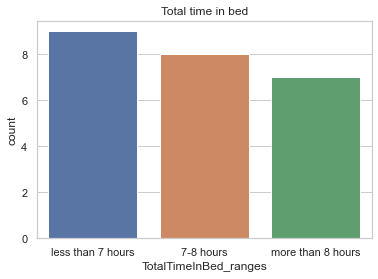

In [210]:
df1 = sleep_day.groupby('Id').mean().reset_index()
#create a function that groups users in 3 categories: sleep <7 hours, sleep 7-8 hours, sleep >8 hours
def assign_ranges(x):
    if x<420:
        return "less than 7 hours"
    elif x>=420 and x<480:
        return "7-8 hours"
    else:
        return "more than 8 hours"
#use lambda function to create a new column based on ranges   
df1['TotalTimeInBed_ranges'] = df1['TotalTimeInBed'].apply(lambda x: assign_ranges(x))
sns.countplot(x="TotalTimeInBed_ranges", data=df1, order=["less than 7 hours", "7-8 hours", "more than 8 hours"]);
plt.title('Total time in bed');

####   
Let's merge the data with the daily activity dataframe and check how the intensities affect the sleep behavior

In [211]:
df2 = daily_activity.groupby(['Id']).mean().reset_index()

# merge both dataframes based on Id column, only Ids common in both dataframes remain
merged_df = pd.merge(df2, df1, on="Id")
merged_df.head(5)

,Id,Day_Of_Week,TotalSteps,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,wake_time,TotalTimeInBed_ranges
0,1503960366,2.900000,12520.633333,8.070000,0.0,2.953667,0.820667,4.291333,0.0,40.000000,19.800000,227.266667,828.433333,1876.966667,1.08,360.280000,383.200000,22.920000,less than 7 hours
1,1644430081,2.900000,7282.966667,5.295333,0.0,0.730000,0.951000,3.609000,0.0,9.566667,21.366667,178.466667,1161.866667,2811.300000,1.00,294.000000,346.000000,52.000000,less than 7 hours
2,1844505072,3.222222,4440.333333,2.936111,0.0,0.014444,0.084444,2.835000,0.0,0.222222,2.222222,198.611111,1078.777778,1774.500000,1.00,652.000000,961.000000,309.000000,more than 8 hours
3,1927972279,2.764706,1670.588235,1.157059,0.0,0.174706,0.057059,0.924706,0.0,2.411765,1.411765,70.352941,1244.352941,2303.058824,1.60,417.000000,437.800000,20.800000,7-8 hours
4,2026352035,2.903226,5566.870968,3.454839,0.0,0.006129,0.011290,3.436129,0.0,0.096774,0.258065,256.645161,689.419355,1540.645161,1.00,506.178571,537.642857,31.464286,more than 8 hours


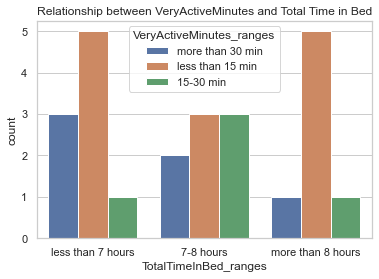

In [212]:
def assign_ranges2(x):
    if x<15:
        return "less than 15 min"
    elif x>=15 and x<30:
        return "15-30 min"
    else:
        return "more than 30 min"
#use lambda function to create a new column based on ranges   
merged_df['VeryActiveMinutes_ranges'] = merged_df['VeryActiveMinutes'].apply(lambda x: assign_ranges2(x))
merged_df
sns.countplot(x='TotalTimeInBed_ranges', data=merged_df, hue='VeryActiveMinutes_ranges', order=['less than 7 hours', '7-8 hours', 'more than 8 hours'])
plt.title('Relationship between VeryActiveMinutes and Total Time in Bed');

In [213]:
new = merged_df[['TotalSteps','Calories','TotalMinutesAsleep','TotalTimeInBed','wake_time','VeryActiveMinutes_ranges']]
new.groupby('VeryActiveMinutes_ranges').mean()

,TotalSteps,Calories,TotalMinutesAsleep,TotalTimeInBed,wake_time
VeryActiveMinutes_ranges,,,,,
15-30 min,8859.965349,2155.724462,391.583679,445.670238,54.086559
less than 15 min,6073.170223,2235.844710,388.567176,437.480008,48.912832
more than 30 min,11197.219438,2840.991740,342.374792,361.118536,18.743745


####   
It is pretty obvious that people who are very active for more than 30 min accumulate the highest number of average calories. In average this group only sleeps for 6 hours a day with the lowest awake time. For the other two groups (which are very active for less than 15 min and 15-30 min) total minutes asleep and awake time are almost similar.

# Summary of main findings:

   1.The data shows a huge variation among the users in terms of measured            features: daily steps, calories, intensities, etc.
   
   2.For 15.6% of the observed time period there is no data available (in             reality this period could be even bigger since the users were paid for         their data via Amazon Mechanical Turk which might have incentivized them)
   
   3.Only 24 out of 33 users provide any sleep related data (device wasn't worn      at night or didn't support this feature) which only covers 40.4% of all        possible observations.
   
   4.Users do not log their activity for the majority of the time.
   
   5.Only 8 out 33 users provided any weight related data. 3 out of these 8          probably have a scale that automatically connects to the FitBit device.
   
   6.Tuesday and Saturday have the highest average step number as well as            calorie consumption. Friday and Sunday are those with the lowest.
   
   7.On weekends people are most active from 12-3pm. During the week from 5-8pm      (which is probably for most people after work).
   
   8.There is only a weak correlation between daily steps and calories, but a        high correlation between veryactiveminutes and calories and                    veryactiveminutes and tracker distance.
   
   9.Users who were very active for more than 30 minutes per day accumulated        the highest amount of calories but also slept the lowest amount of time        (approx. 6 hours) and shortest awake time.
